




<a href="https://codeimmersives.com"><img src = "https://www.codeimmersives.com/wp-content/uploads/2019/09/CodeImmersives_Logo_RGB_NYC_BW.png" width = 400> </a>


<h1 align=center><font size = 5>Agenda</font></h1>

###
<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Hwk Review](#0)<br>
2.  [Matplotlib+Pandas Exercises](#2)<br>
3.  Exercises in-class
4.  [Review](#12)<br>
</div>
<hr>

<h2> Working with Pandas and Matplotlib </h2>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## MovieLens 1M Dataset

working with 3 dat files - generic data types, in this case holding plain text, read in using pd.read_table(), assign labels with a look


In [30]:
# Make display smaller
pd.options.display.max_rows = 10

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('users.dat', sep='::', #filename, sep, header, names
                      header=None, names=unames)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ratings.dat', sep='::',
                        header=None, names=rnames)

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat', sep='::',
                       header=None, names=mnames)

/var/folders/b4/472y3ctn1pqbkmp53ly8qpr40000gn/T/ipykernel_24731/2500876356.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_table('users.dat', sep='::', #filename, sep, header, names
/var/folders/b4/472y3ctn1pqbkmp53ly8qpr40000gn/T/ipykernel_24731/2500876356.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_table('ratings.dat', sep='::',
/var/folders/b4/472y3ctn1pqbkmp53ly8qpr40000gn/T/ipykernel_24731/2500876356.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from

View the tables

In [31]:
users[:5]
movies[:5]
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


It will be a good idea to merge for ease of access here...merges automatically on common columns...

In [32]:
data= pd.merge(pd.merge(ratings, users), movies)
data


,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


Now for filtering, I want to group by movie title and find only the 'active' titles. Active means that there are over 250 ratings at least in my dataset for the movie. How should I do this?

In [33]:
ratings_by_title = data.groupby('title').size()
ratings_by_title
active_titles = ratings_by_title[ratings_by_title>=250]
active_titles

title
'burbs, The (1989)                   303
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
                                    ... 
Young Guns (1988)                    562
Young Guns II (1990)                 369
Young Sherlock Holmes (1985)         379
Zero Effect (1998)                   301
eXistenZ (1999)                      410
Length: 1216, dtype: int64

Introducing a nifty pandas shortcut to frame creation: the pivot table! Exact same creation mechanism as for dataframes (data, index, columns) but now we can specify an aggfunc parameter at the end. Defaults to 'mean'. Avoids the need for a lambda or iterable and recreates a new frame in place!

In [6]:
mean_ratings = data.pivot_table('rating', index='title', #data, index, columns, aggfunc
                                columns='gender', aggfunc='mean') #aggfunc = 'mean' default
mean_ratings


gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000


In [9]:
import numpy as np
std_ratings = data.pivot_table('rating', index='title', #data, index, columns, aggfunc
                                columns='gender', aggfunc= np.std) #aggfunc = 'mean' default
std_ratings

gender,F,M
title,,
"$1,000,000 Duck (1971)",0.957427,1.135991
'Night Mother (1986),1.021981,1.228015
'Til There Was You (1997),0.973369,1.162919
"'burbs, The (1989)",1.124532,1.099127
...And Justice for All (1979),0.954424,0.862086
...,...,...
"Zed & Two Noughts, A (1985)",1.195229,1.023533
Zero Effect (1998),1.166451,1.011245
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,0.707107


Now I want to filter mean ratings on only active ratings:


In [13]:
active_titles_ind = active_titles.index

In [22]:
std_ratings = std_ratings.loc[active_titles_ind]
std_ratings

gender,F,M
title,,
"'burbs, The (1989)",1.124532,1.099127
10 Things I Hate About You (1999),0.986965,0.973364
101 Dalmatians (1961),0.882525,1.015137
101 Dalmatians (1996),1.072412,1.099110
12 Angry Men (1957),0.883199,0.788587
...,...,...
Young Guns (1988),0.884337,1.037917
Young Guns II (1990),1.062537,1.074875
Young Sherlock Holmes (1985),0.889284,0.890709


In [15]:
mean_ratings = mean_ratings.loc[active_titles_ind]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


I want to see the top female ratings to get an insight into the movies that females prefer so:

In [16]:
top_female_ratings = mean_ratings.sort_values(by ='F', ascending =False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


I'm also interested in the movie ratings for which gender opinions differ the most so I'll examine this by creating a difference column subtracting the rating results between male and female reviewers and find the top results

In [19]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


<Axes: xlabel='title'>

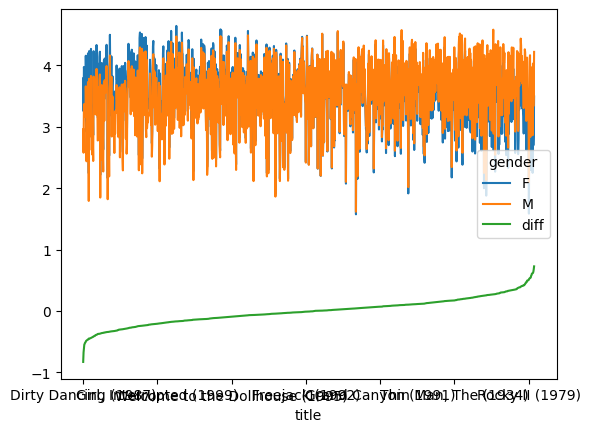

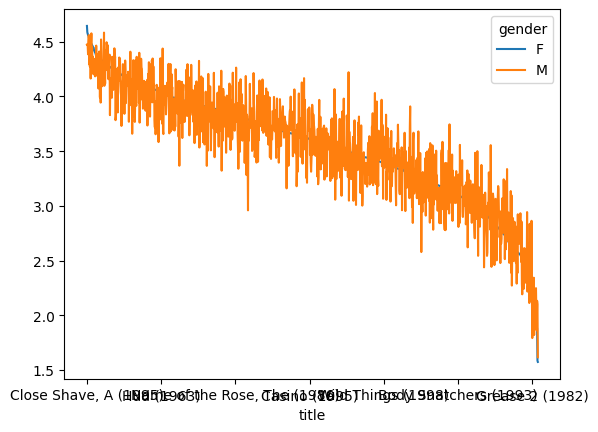

In [21]:
sorted_by_diff.plot()
top_female_ratings.plot()


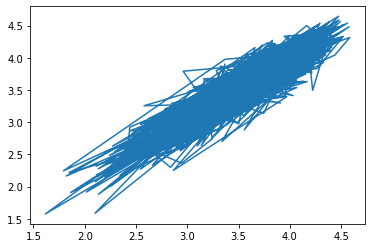

In [ ]:
plt.plot(mean_ratings['M'], mean_ratings['F'])
plt.show()

<h2> Exercise: </h2>
1) Add on a rating stdev by title column. <br>
2) Filter the rating standard deviations by active titles only. <br>
3) Sort the series by value in descending order.<br>
4) Plot the first 10 stdevs in your series in matplotlib

In [38]:
# 1) Add on a rating stdev by title column.

std_ratings2 = data.pivot_table('rating', index='title', aggfunc= np.std)
std_ratings2['std_ratings'] = std_ratings2['rating']
std_ratings2

,rating,std_ratings
title,,
"$1,000,000 Duck (1971)",1.092563,1.092563
'Night Mother (1986),1.118636,1.118636
'Til There Was You (1997),1.020159,1.020159
"'burbs, The (1989)",1.107760,1.107760
...And Justice for All (1979),0.878110,0.878110
...,...,...
"Zed & Two Noughts, A (1985)",1.052794,1.052794
Zero Effect (1998),1.042932,1.042932
Zero Kelvin (Kjærlighetens kjøtere) (1995),0.707107,0.707107


In [ ]:
# 2) Filter the rating standard deviations by active titles only.

In [ ]:
# 3) Sort the series by value in descending order.

In [ ]:
# 4) Plot the first 10 stdevs in your series in matplotlib

<h2> Back to Y-Finance Exercise </h2>

Use the previously used yahoo finance pickle files to create two new dataframes. <br>
1) Plot the price of Apple in the month of January 2010 and compare to a graph of the volume of Apple in January 2010. <br>
2) Plot the price of IBM in April 2010 and the price of Miscrosoft in April 2010 on one graph and compare. <br>
3) Plot all prices over the year of 2010 in one graph. This may require some experimentation on your end to see what fits, what doesn't. <br>

Solution:

<Axes: xlabel='Date'>

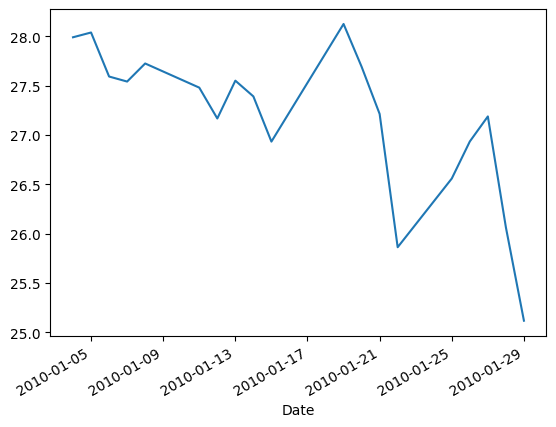

In [24]:
import matplotlib as mpl
import matplotlib.pyplot as plt

price = pd.read_pickle('yahoo_price.pkl')
volume = pd.read_pickle('yahoo_volume.pkl')

price=pd.DataFrame(price)
volume=pd.DataFrame(volume)

priceapple = price.loc['2010-01']['AAPL']
volumeappl = volume.loc['2010-01']['AAPL']

priceapple.plot()


<Axes: xlabel='Date'>

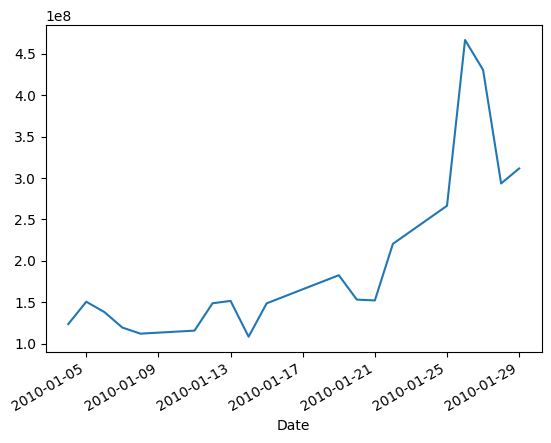

In [25]:
volumeappl.plot()

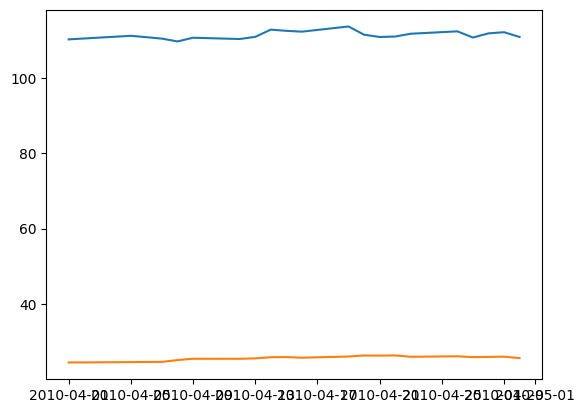

In [26]:
priceibm = price.loc['2010-04']['IBM']
pricemsf = price.loc['2010-04']['MSFT']
nfram = pd.DataFrame({'IBM': priceibm,
                      'MSFT': pricemsf})
plt.plot(nfram)

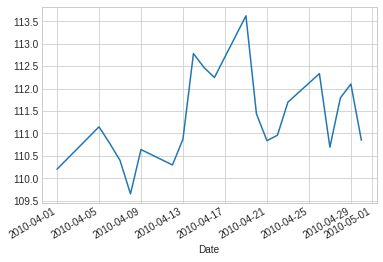

In [ ]:
priceibm.plot()

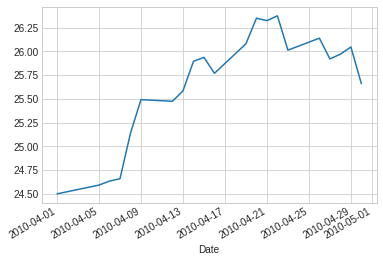

In [ ]:
pricemsf.plot()

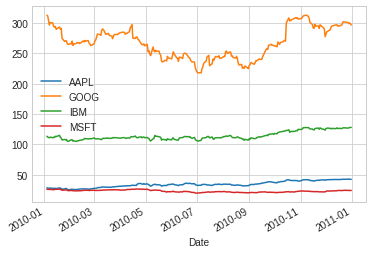

In [ ]:
prices = price.loc['2010']
prices.plot()
plt.savefig('prices.png')

<h3> Problem </h3>

Using Yahoo Finance; download Bitcoin, Ethereum USD, and Tesla stocks for all of 2021.

1) Clean the data

2) Organize the stocks by date then symbol.

3) Round all of the digits to 2 after the decimal

4) Cal the highest adjusted close stock price for the year for each stock.

5) Then calc the lowest price

6) Calc stock growth for the year. Did it go up or down? Plot the results for each stock in matplotlib using a graph and style of your choice.

In [27]:
!pip3 install yfinance


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 62 kB 2.7 MB/s eta 0:00:011
     |████████████████████████████████| 62 kB 9.7 MB/s  eta 0:00:01
     |████████████████████████████████| 112 kB 9.3 MB/s eta 0:00:01
     |████████████████████████████████| 5.3 MB 13.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.7 MB 16.2 MB/s eta 0:00:01��██████▏       | 2.8 MB 16.2 MB/s eta 0:00:01
     |████████████████████████████████| 122 kB 28.8 MB/s eta 0:00:01
     |████████████████████████████████| 123 kB 27.7 MB/s eta 0:00:01
     |████████████████████████████████| 156 kB 58.2 MB/s eta 0:00:01
  Created wheel for lxml: filename=lxml-4.9.2-cp39-cp39-macosx_10_9_universal2.whl size=3114683 sha256=e05176931d08b2b1b9d7fb0fa144c9288d25fc60f45e3aaf9d099d4d030b1ba3
  Stored in directory: /Users/brennanstopnik/Library/Caches/pip/wheels/74/7c/5a/e117656a962a1a15a3d2ac1bde4bc6193d62dc5d7e9c51e15e
Successfully built lxml
You 

In [28]:
import yfinance as yf

tickers = ['BTC-USD', 'ETH-USD', 'TSLA']

start_date = '2021-01-01'
end_date = '2021-12-31'

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    
    # Save the data to a CSV file
    filename = f"{ticker}_2021.csv"
    data.to_csv(filename)
    print(f"Data for {ticker} saved to {filename}")

/Users/brennanstopnik/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


[*********************100%***********************]  1 of 1 completed
Data for BTC-USD saved to BTC-USD_2021.csv
[*********************100%***********************]  1 of 1 completed
Data for ETH-USD saved to ETH-USD_2021.csv
[*********************100%***********************]  1 of 1 completed
Data for TSLA saved to TSLA_2021.csv


<h2> Hwk  </h2>


Create a class that operates on words

1 - method 'remove_vowels' - Strips all vowels out

2 - method 'strip_constants' - Strips constants

3 - method 'strip_fixed' - Strips based on a skip

4 - print gives the word and and counts the number of vowels and the number of constants

5 - Add a method that randomly removes up to n chars but has to be less than the length - 1(colapses)

6 - On all removal options add option to replace the removal with a specified character. The default is an underscore '_'